In [1]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


V5: noisier and more realistic

In [2]:
time_window = 50
batch_size = 128 # 128: anil kag

ckpt_dir = 'copymemory_04_2025_tests'

dataset = 'copymemory_episodic'
#dataset = 'addtask' 

num_epochs = 3000 # important: epochs here refer to iteration steps

dataset_size = batch_size*num_epochs

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   dataset_size = dataset_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

C:\Users\Alberto\Python\SNNdelays\snn_delays\datasets\sequential_datasets.py:280: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3641.)
  label[:,0] = seq[start_time:start_time + mem_length, 0].T.clone().detach()


torch.Size([128, 50, 3])
torch.Size([128, 5, 5])


In [3]:
train_loader

In [4]:
len(train_loader)

3000

In [5]:
print(lbl[0])

tensor([[0.1000, 0.3000, 0.2000, 0.2000, 0.7000],
        [0.1000, 0.3000, 0.2000, 0.2000, 0.7000],
        [0.1000, 0.3000, 0.2000, 0.2000, 0.7000],
        [0.1000, 0.3000, 0.2000, 0.2000, 0.7000],
        [0.1000, 0.3000, 0.2000, 0.2000, 0.7000]], device='cuda:0')


Training copy memory task

In [6]:
num_h = 16

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
#snn_f.num_train_samples = batch_size
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
#snn_rnn.num_train_samples = batch_size
snn_rnn.to(device)

extra_kwargs = {'delay_range':(40, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
#snn_rd.num_train_samples = batch_size
snn_rd.to(device)

Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=16, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=640, out_features=16, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=16, out_features=5, bias=False)
    )
  )
)

28 min

In [7]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rnn, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rd, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)

Epoch [1/1], learning_rates 0.001000, 1.000000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [300/3000], Loss: 0.06406
Step [600/3000], Loss: 0.06806
Step [900/3000], Loss: 0.06827
Step [1200/3000], Loss: 0.06699
Step [1500/3000], Loss: 0.06070
Step [1800/3000], Loss: 0.06387
Step [2100/3000], Loss: 0.06204
Step [2400/3000], Loss: 0.06205
Step [2700/3000], Loss: 0.06046
Step [3000/3000], Loss: 0.05448
384000
Time elasped: 1163.357477426529
Epoch [1/1], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 0.06780
Step [600/3000], Loss: 0.06852
Step [900/3000], Loss: 0.06567
Step [1200/3000], Loss: 0.06868
Step [1500/3000], Loss: 0.06844
Step [1800/3000], Loss: 0.06970
Step [2100/3000], Loss: 0.06929
Step [2400/3000], Loss: 0.06475
Step [2700/3000], Loss: 0.06592
Step [3000/3000], Loss: 0.06967
384000
Time elasped: 1136.2157790660858
Epoch [1/1], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 0.06836
Step [600/3000], Loss: 0.06447
Step [900/3000], Loss: 0.07055
Step [1200/3000], Loss: 0.06727
Step [1500/3000], Loss: 0.06921
Step [1800/3000], Loss: 0.06382
Step

Text(0.5, 1.0, 'train loss')

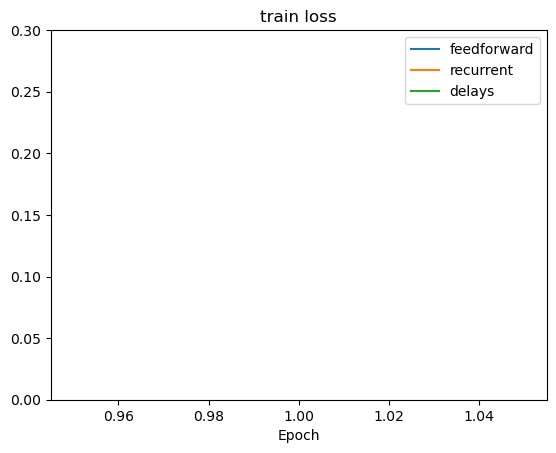

In [18]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 0.3)
plt.title('train loss')

In [19]:
snn_f.debug = True
snn_rnn.debug = True
snn_rd.debug = True
snn_f.init_state_logger()
snn_rnn.init_state_logger()
snn_rd.init_state_logger()

from snn_delays.utils.train_utils_refact_minimal import propagate_batch_simple
images, labels_mf = propagate_batch_simple(snn_f, test_loader)
_, labels_rnn = propagate_batch_simple(snn_rnn, test_loader)
_, labels_rd = propagate_batch_simple(snn_rd, test_loader)

In [20]:
ref_mf = labels_mf[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_mf = snn_f.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rnn = labels_rnn[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_rnn = snn_rnn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rd = labels_rd[:,:int(0.1*time_window),:].permute(1, 0, 2).cpu().numpy()
out_rd = snn_rd.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

In [21]:
print(np.abs(ref_mf - out_mf).sum())
print(np.abs(ref_rnn - out_rnn).sum())
print(np.abs(ref_rd - out_rd).sum())

604.49414
703.66675
676.5178


In [22]:
from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4
# Create a figure with 3 rows and N columns (for stacking results horizontally)

def plot_add_task(output, reference, N, axes=None, name=''):

    ns = 50 # num samples to display for better viz

    ref = reference[:, :ns , N]
    out = output[:, :ns , N]
    diff = abs(ref-out)

    print(np.mean(diff))

    if axes is None:
        fig, axes = plt.subplots(3, 1, figsize=(5, 10))  # Create a new figure if axes not provided

    axes[0].imshow(ref, vmin=0, vmax=0.9)
    axes[0].set_title('Reference '+name)
    axes[0].set_ylabel('Time')

    axes[1].imshow(out, vmin=0, vmax=0.9)
    axes[1].set_title('Output')
    axes[1].set_ylabel('Time')

    axes[2].imshow(diff, vmin=0.0, vmax=1.0)
    axes[2].set_title('Difference')
    axes[2].set_ylabel('Time')
    axes[2].set_xlabel('Training Sample')

    return axes  # Return the axes to be used in an external figure

0.22026703
0.21922451
0.20991854


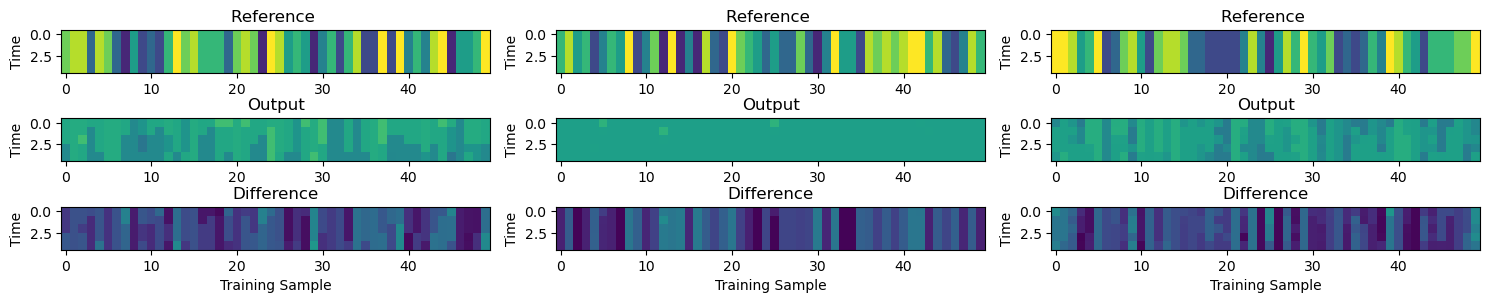

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 0, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 0, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 0, axes[:, 2])  

plt.tight_layout()
plt.show()

0.21218094
0.22847249
0.21651393


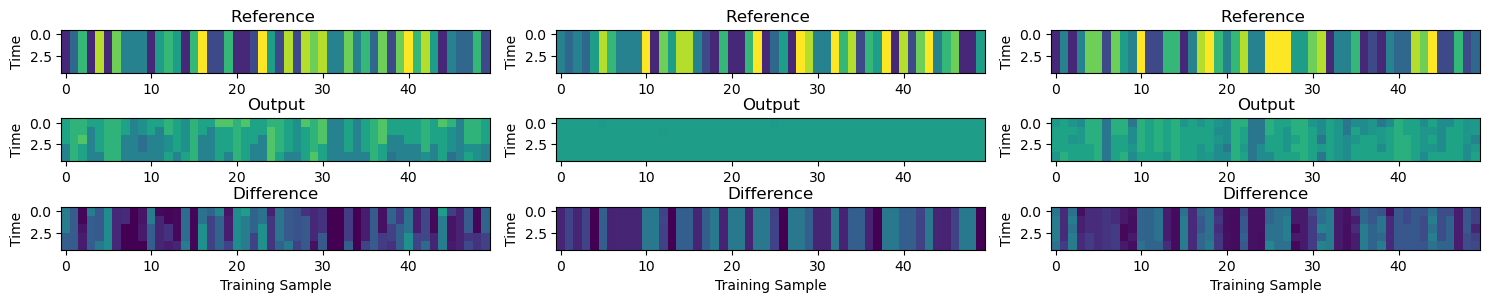

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 1, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 1, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 1, axes[:, 2])  

plt.tight_layout()
plt.show()

0.19433925
0.21970257
0.2312282


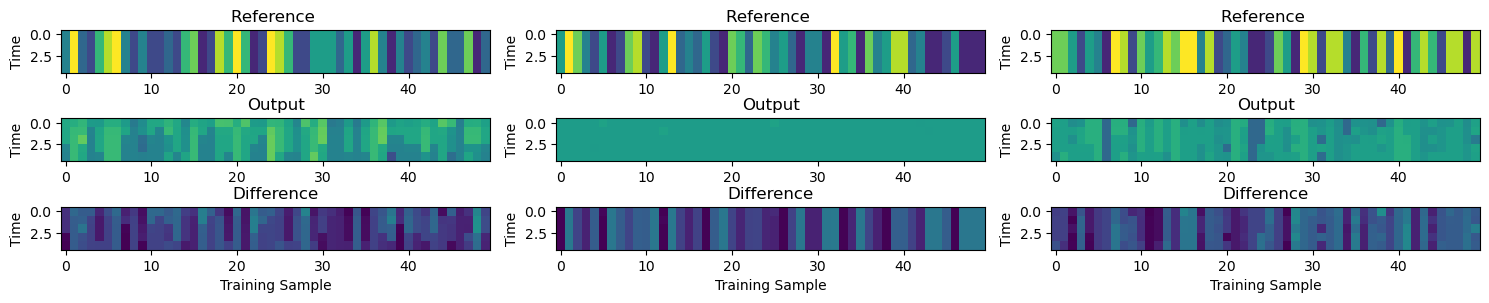

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 2, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 2, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 2, axes[:, 2])  

plt.tight_layout()
plt.show()

0.21065252
0.23997296
0.24087772


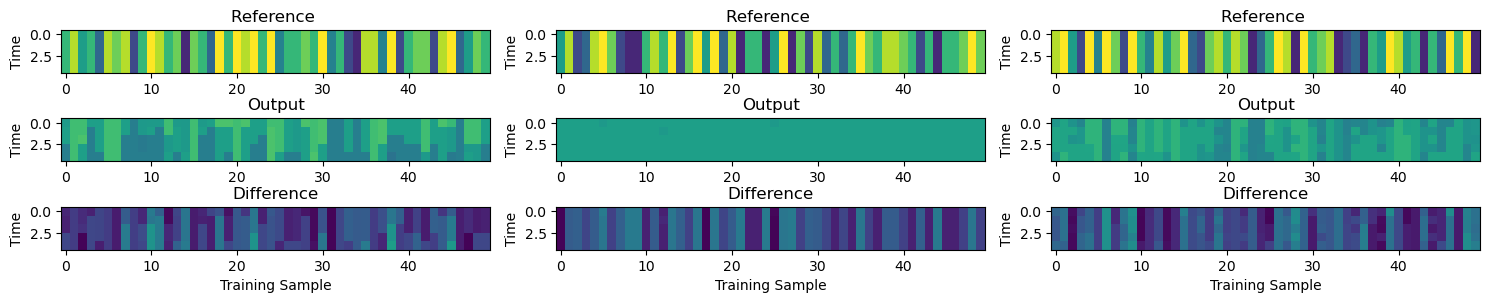

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 3, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 3, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 3, axes[:, 2])  

plt.tight_layout()
plt.show()

0.13205546
0.23677145
0.20525916


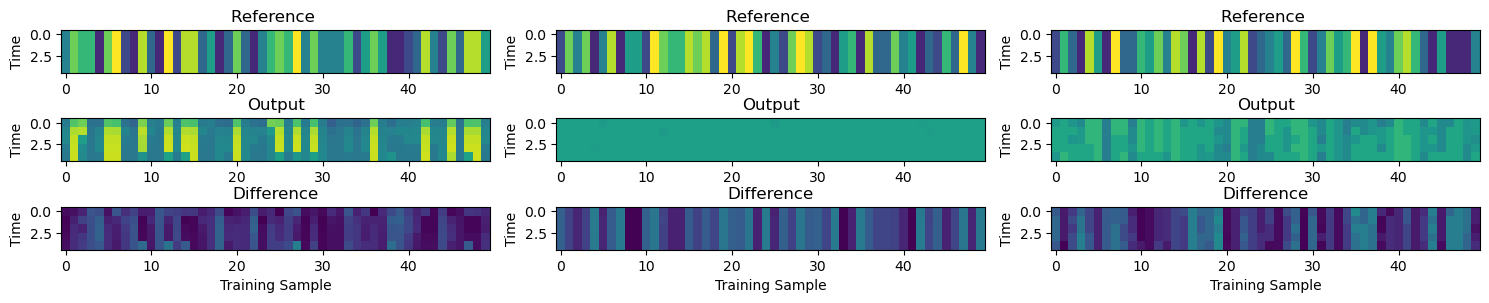

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 4, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 4, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 4, axes[:, 2])  

plt.tight_layout()
plt.show()